In [13]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

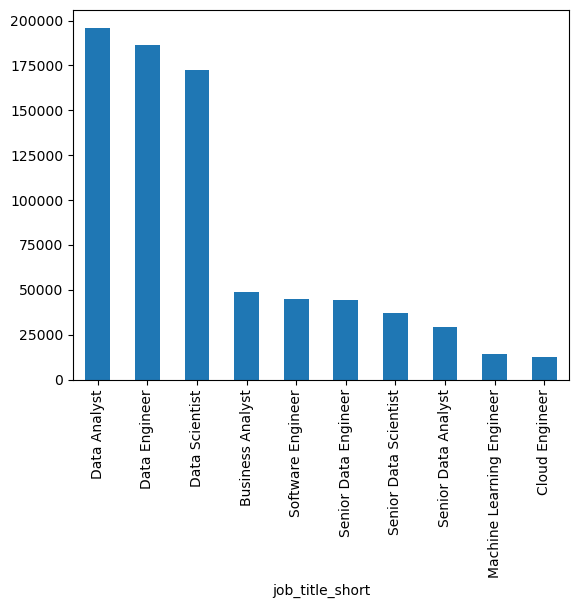

In [14]:
fig, ax =plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [15]:
df['job_schedule_type'].value_counts().head(3)



job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

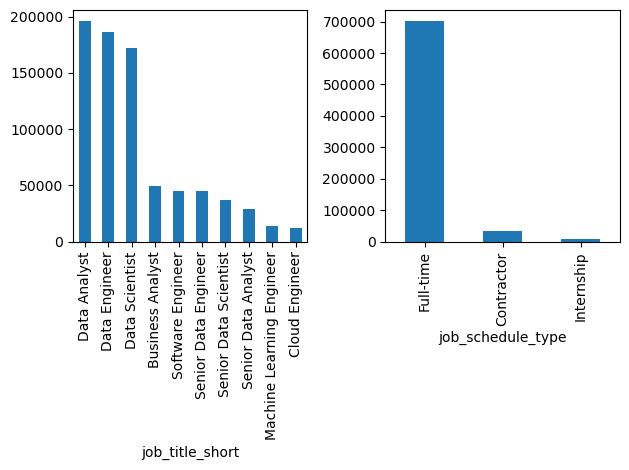

In [22]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()

In [23]:
df_Skills = df.copy()
df_Skills = df_Skills.explode('job_skills')
skill_count = df_Skills.groupby(['job_skills', 'job_title_short']).size()
df_Skills_count = skill_count.reset_index(name='skill_count')
df_Skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_Skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [25]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

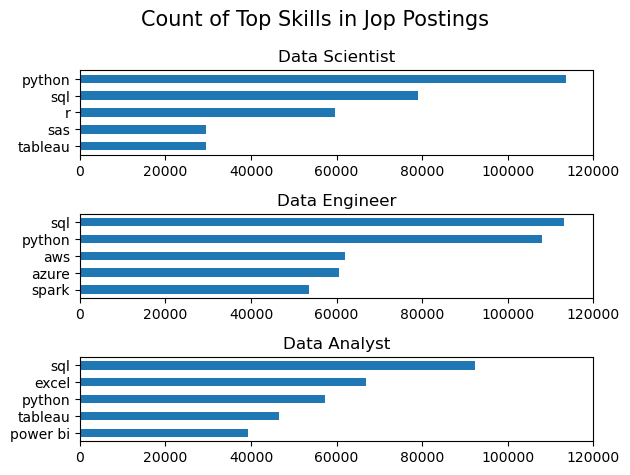

In [42]:
fig, ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_Skills_count[df_Skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Count of Top Skills in Jop Postings', fontsize=15)
fig.tight_layout()